## Plot spike trains
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt

os.chdir('../..')
print(os.getcwd())

from synapticonn.plots import plot_acg, plot_ccg
from synapticonn.postprocessing import compute_crosscorrelogram
from synapticonn.postprocessing import compute_autocorrelogram

import synapticonn as synapticonn

/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'BD0187_spikesorting_array.pkl')

# open pickle
all_units = np.load(data_fpath, allow_pickle=True)
all_units = all_units['spike_time_set']
# spike_train_1 = all_units[0]/30_000  # unit 0
# spike_train_2 = all_units[1]/30_000  # unit 1

Set parameters.

In [3]:
srate = 30_000
bin_size_ms = 0.5
max_lag_ms = 25

Initialize the object.

In [4]:
snc = synapticonn.SynaptiConn(all_units, bin_size_ms=1, max_lag_ms=100, srate=30_000, recording_length=600)

Check the loaded spike units.

In [5]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,5,302
1,1,1152
2,0,918
3,16,524
4,17,315
5,18,195
6,15,192
7,4,299
8,3,277


Compute the autocorrelogram for select unit IDs.

In [13]:
snc.plot_autocorrelogram(spike_units_to_plot=[0,1,5])

# ensure that the input is a list type 
# need to build in checks for the type inserts
# check if any units were not able to be found / matched

Plotting autocorrelogram for spike units: [0 1 5]


Plot spike train.

In [5]:
# import matplotlib.pyplot as plt

# n_cells = all_units['unit_t'].shape[1]

# # plot spike trains for each cell
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# for cell in range(n_cells):
#     ax.eventplot(all_units['unit_t'][0][cell].T, lineoffsets=cell, colors='k', linewidths=0.5)
    
# # axis labels
# ax.set_xlabel('Time (s)')
# ax.set_ylabel('Cell #')

# plt.show()

Plot autocorrelograms for individual cells.

NameError: name 'spike_train_1' is not defined

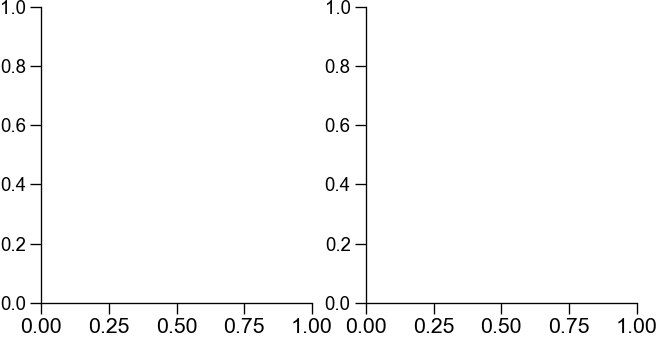

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=False, sharex=True)

# bin parameters
bin_size_ms = 1
max_lag_ms = 20

plot_acg(spike_train_1*1000, bin_size_ms, max_lag_ms, color='red', ax=ax[0])
ax[0].set_title('Unit 0')

plot_acg(spike_train_2*1000, bin_size_ms, max_lag_ms, color='blue', ax=ax[1], file_name='test', file_path='.', extension='png')
ax[1].set_title('Unit 1')
ax[1].set_ylabel('')

In [ ]:
lags, autocorr = compute_autocorrelogram(spike_train_1*1000, 0.5, max_lag_ms)
lags, autocorr

(array([-19.75, -19.25, -18.75, -18.25, -17.75, -17.25, -16.75, -16.25,
        -15.75, -15.25, -14.75, -14.25, -13.75, -13.25, -12.75, -12.25,
        -11.75, -11.25, -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,
         -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,
         -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,
          0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,
          4.25,   4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,
          8.25,   8.75,   9.25,   9.75,  10.25,  10.75,  11.25,  11.75,
         12.25,  12.75,  13.25,  13.75,  14.25,  14.75,  15.25,  15.75,
         16.25,  16.75,  17.25,  17.75,  18.25,  18.75,  19.25,  19.75]),
 array([3, 1, 3, 2, 3, 0, 2, 2, 5, 3, 3, 7, 3, 4, 3, 8, 1, 2, 2, 2, 4, 2,
        1, 0, 0, 0, 4, 3, 4, 1, 1, 1, 0, 0, 2, 5, 0, 3, 1, 0, 0, 1, 3, 0,
        5, 2, 0, 0, 1, 1, 1, 4, 3, 3, 1, 0, 0, 1, 2, 4, 2, 2, 2, 1, 8, 3,
        4, 3, 5, 5, 3, 5, 2, 2, 0, 3, 1, 4, 1, 3]))

In [ ]:
idx = np.where((lags > -2) & (lags < 2))  # isolate in a 2ms window using the lags
total_refractory_violations = np.sum(autocorr[idx])
proportion_refractory_violations = total_refractory_violations / len(spike_train_1)

print(f'Total refractory violations: {total_refractory_violations}')
print(f'Proportion refractory violations: {proportion_refractory_violations*100}')

# print out the binning etc etc. for this ...
# identify units with poor ACG / noisy ACGs
# add an option to remove these units from the analysis --> build this in to the object? Will make it then easier to manipulate the objects here

Total refractory violations: 8
Proportion refractory violations: 0.8714596949891068


Cross-correlogram plots between units.

In [ ]:
srate = 30_000

labels = list(all_units.keys())
spike_times_set = list(all_units.values())

if srate: 
    spike_times_set = [spike_times/srate for spike_times in spike_times_set]

bin_size_ms = 0.5
max_lag_ms = 25
cross_correlograms_data = compute_crosscorrelogram(spike_times_set, labels, bin_size_ms, max_lag_ms)

In [ ]:
spike_times_set

[array([3.70000000e-02, 1.01076667e+00, 2.43186667e+00, 3.21976667e+00,
        3.99056667e+00, 5.34116667e+00, 6.99876667e+00, 8.25933333e+00,
        9.61086667e+00, 1.29460000e+01, 1.56087667e+01, 1.67817333e+01,
        1.91503000e+01, 2.04136333e+01, 2.12745333e+01, 2.32617333e+01,
        2.98763000e+01, 3.08889667e+01, 3.14764333e+01, 3.47374000e+01,
        3.88992000e+01, 4.45120333e+01, 5.40667667e+01, 5.48452000e+01,
        6.34974000e+01, 6.41382333e+01, 6.48862000e+01, 7.28615000e+01,
        7.36154667e+01, 7.43903000e+01, 7.48496000e+01, 7.84231667e+01,
        8.27839333e+01, 9.70094667e+01, 9.95140000e+01, 1.00965700e+02,
        1.03636800e+02, 1.04342000e+02, 1.05539133e+02, 1.07394433e+02,
        1.08981100e+02, 1.11468500e+02, 1.13664867e+02, 1.14589400e+02,
        1.17711800e+02, 1.21212267e+02, 1.23115000e+02, 1.25135667e+02,
        1.27302200e+02, 1.28961667e+02, 1.29825833e+02, 1.31684400e+02,
        1.32830533e+02, 1.34816567e+02, 1.38980033e+02, 1.400976

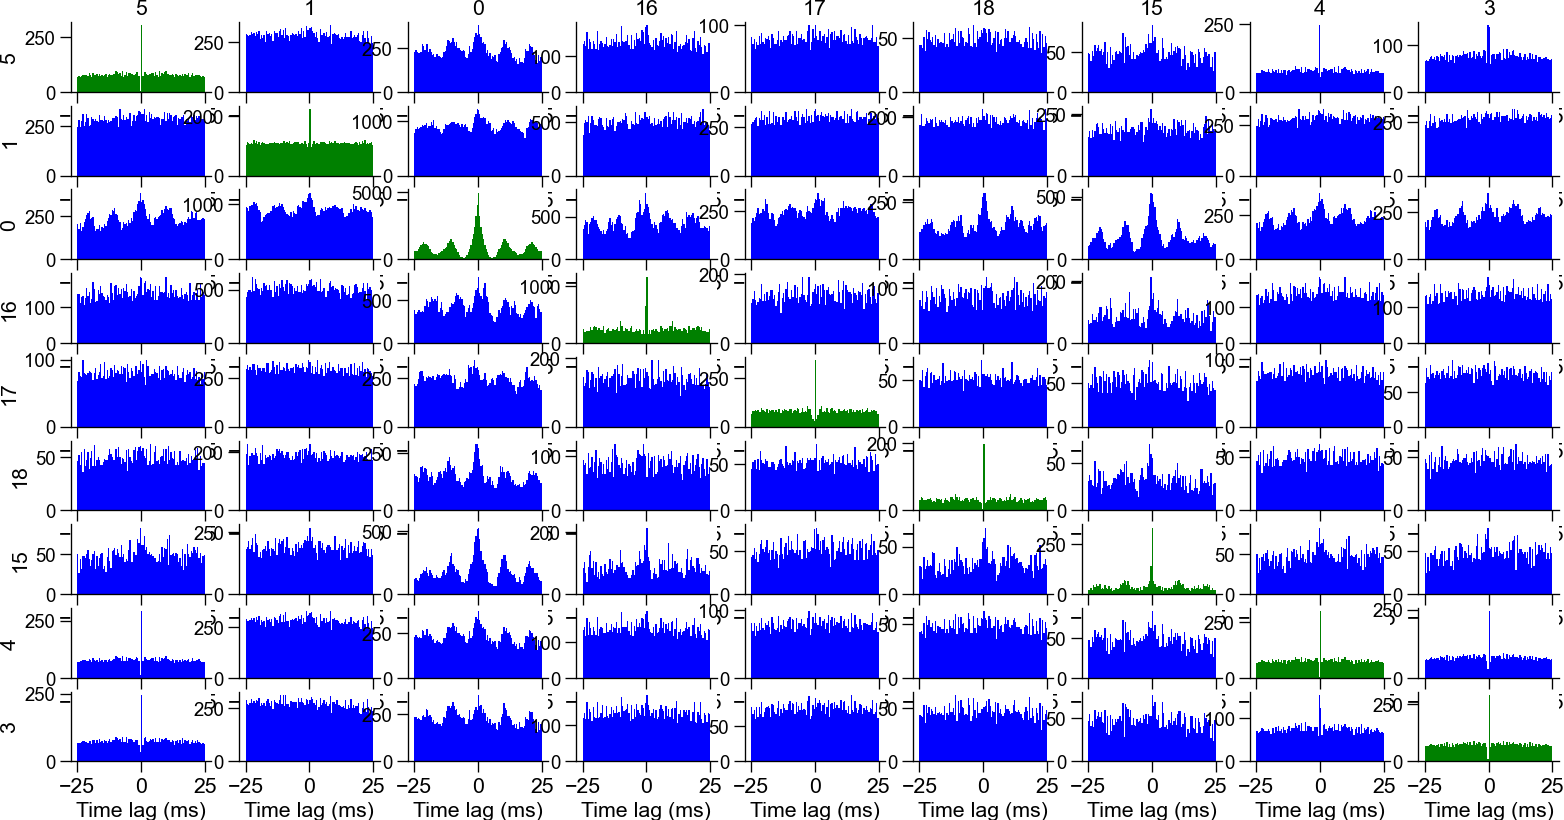

In [ ]:
# fig, ax = plt.subplots(9, 9, figsize=(10, 10), sharey=False, sharex=True)
plot_ccg(cross_correlograms_data, labels=labels, ax=None, figsize=(20, 10))
# file_name='test', file_path='.', extension='png'

In [ ]:
# file_name='test', file_path='.', extension='png'

TO DO: 

- Test units

- Plot for multiple ACGS
    - option to subselect for only 1
    - similar to the CG processing?


- Style is not being fitted globally --> the decorator is useless?

- Check the distances between the units?

- Document all the steps in place to check this all out ...

- Option to only plot certain pairs ...

- Option to improve the labels here for the units? Check it with different input types

- Build a core object which allows for batch-processing, but also adds in the srates etc. of the recordings

- Option to cross-check with the distances???

- Add checks for the correlograms